<a href="https://colab.research.google.com/github/ansiyo/Machine-Learning-Rep/blob/main/AarhusRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
df=pd.read_csv('/content/e-waste realdata.csv')

In [ ]:
df.head()

,Date,County,Street/Area Name,latitude,longitude,Site No.,E-waste
0,27/12/2024,Kilifi,Vescon Mtwapa,-3.923442,39.749668,1,Television
1,27/12/2024,Kilifi,Vescon Mtwapa,-3.923518,39.750456,3,Vedio game
2,27/12/2024,Kilifi,Vescon Mtwapa,-3.923857,39.751584,2,Router cable
3,28/12/2024,Kilifi,Kikambala Estate,-3.889410,39.769400,1,Television
4,28/12/2024,Kilifi,Elsek Estate,-3.889743,39.769756,5,Android phone


In [ ]:
df.shape

(16, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              16 non-null     object 
 1   County            16 non-null     object 
 2   Street/Area Name  16 non-null     object 
 3   latitude          16 non-null     float64
 4   longitude         16 non-null     float64
 5   Site No.          16 non-null     int64  
 6   E-waste           16 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.0+ KB


Index(['Date', 'County', 'Street/Area Name', 'latitude', 'longitude',
       'Site No.', 'E-waste ', 'Unnamed: 7', 'Total'],
      dtype='object')


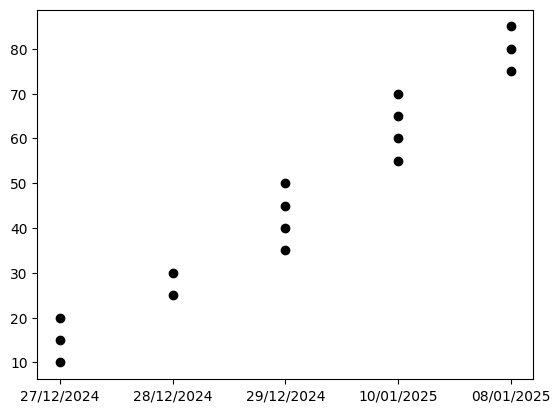

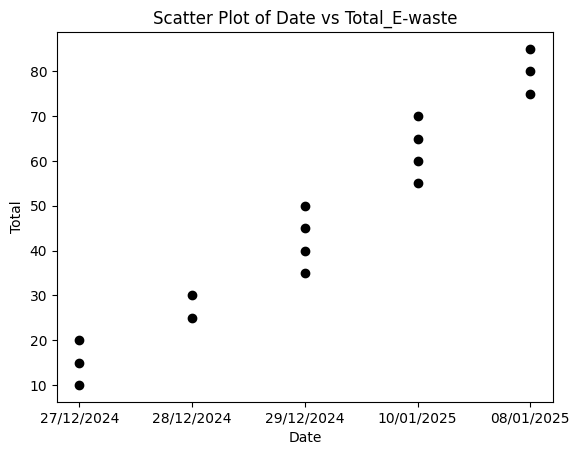

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

df = pd.read_csv('/content/e-waste realdata.csv')

# Check the actual column names in your DataFrame
print(df.columns)

# Use the correct column name from the printed output
# Replace 'ActualColumnName' with the actual name of the column from df.columns
plt.figure()
plt.scatter(df['Date'], df['Total'], c='black')  # Corrected column name
plt.figure()
plt.scatter(df['Date'], df['Total'], c='black')  # Corrected column name
plt.xlabel("Date")
plt.ylabel("Total")
plt.title("Scatter Plot of Date vs Total_E-waste")
plt.show()

In [ ]:
X = df['Date'].values.reshape(-1,1) # Changed 'data' to 'df' to use the existing DataFrame
y = df['Total'].values.reshape(-1,1) # Changed 'data' to 'df' to use the existing DataFrame
reg = LinearRegression()
reg.fit(X, y)

ValueError: could not convert string to float: '27/12/2024'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

df = pd.read_csv('/content/e-waste realdata.csv')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')  # Assuming your date format is 'dd/mm/yyyy'

# Extract numerical features from the datetime objects (e.g., ordinal)
df['Date_Ordinal'] = df['Date'].apply(lambda date: date.toordinal())

# Now use the 'Date_Ordinal' column as your feature
X = df['Date_Ordinal'].values.reshape(-1, 1)
y = df['Total'].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [ ]:
reg.score(X,y)

0.7507041189024201

In [ ]:
print(reg.coef_)
print(reg.intercept_)

[[1.20599572]]
[-891511.40428265]


In [ ]:
y_pred = reg.predict(X)
plt.figure()
plt.scatter(data['Date'],data['Total'],c='yellow')
plt.plot(data['Date'],y_pred,c='blue',linewidth=2)
plt.xlabel("Date")
plt.ylabel("Total")
plt.show()

NameError: name 'data' is not defined

<Figure size 640x480 with 0 Axes>

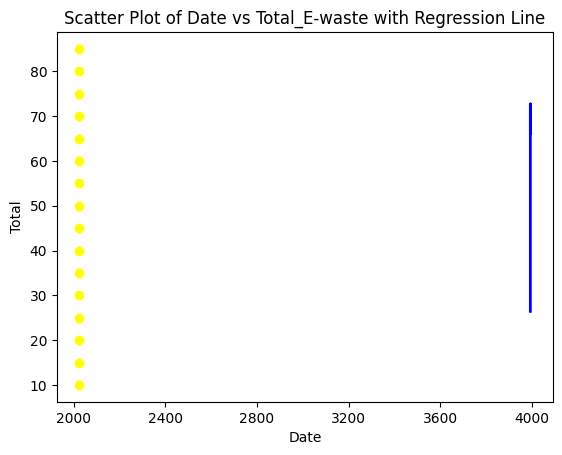

In [ ]:
y_pred = reg.predict(X)
plt.figure()
plt.scatter(df['Date'], df['Total'], c='yellow')  # Changed 'data' to 'df'
plt.plot(df['Date_Ordinal'], y_pred, c='blue', linewidth=2)  # Changed 'data' to 'df' and used the ordinal feature for plotting
plt.xlabel("Date")
plt.ylabel("Total")
plt.title("Scatter Plot of Date vs Total_E-waste with Regression Line")  # Added title for clarity
plt.show()

In [ ]:
X = df['Date']  # Replace 'data' with 'df'
y = df['Total']  # Replace 'data' with 'df'
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
X = df['Date_Ordinal']  # Use the ordinal representation of the date
y = df['Total']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     42.16
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           1.42e-05
Time:                        13:02:22   Log-Likelihood:                -61.792
No. Observations:                  16   AIC:                             127.6
Df Residuals:                      14   BIC:                             129.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.444e+06   3.76e+05     -6.493   

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)
